<a href="https://colab.research.google.com/github/kritikainwat/Data-science/blob/main/Heart_failure_predecsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [7]:
data=pd.read_csv('/content/archive (5) (1).zip')

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.shape

(299, 13)

In [10]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
categorical_variable = data[[ 'anaemia','diabetes','high_blood_pressure','sex','smoking']]
continous_variable = data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine',\
                    'serum_sodium','time' ]]

In [15]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.000,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.000,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.000,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.000,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [16]:
pd.set_option('display.max_rows',300)
data.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [19]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [20]:
continous_variable.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [21]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [22]:
age=data[['age']]
platelets=data[['platelets']]

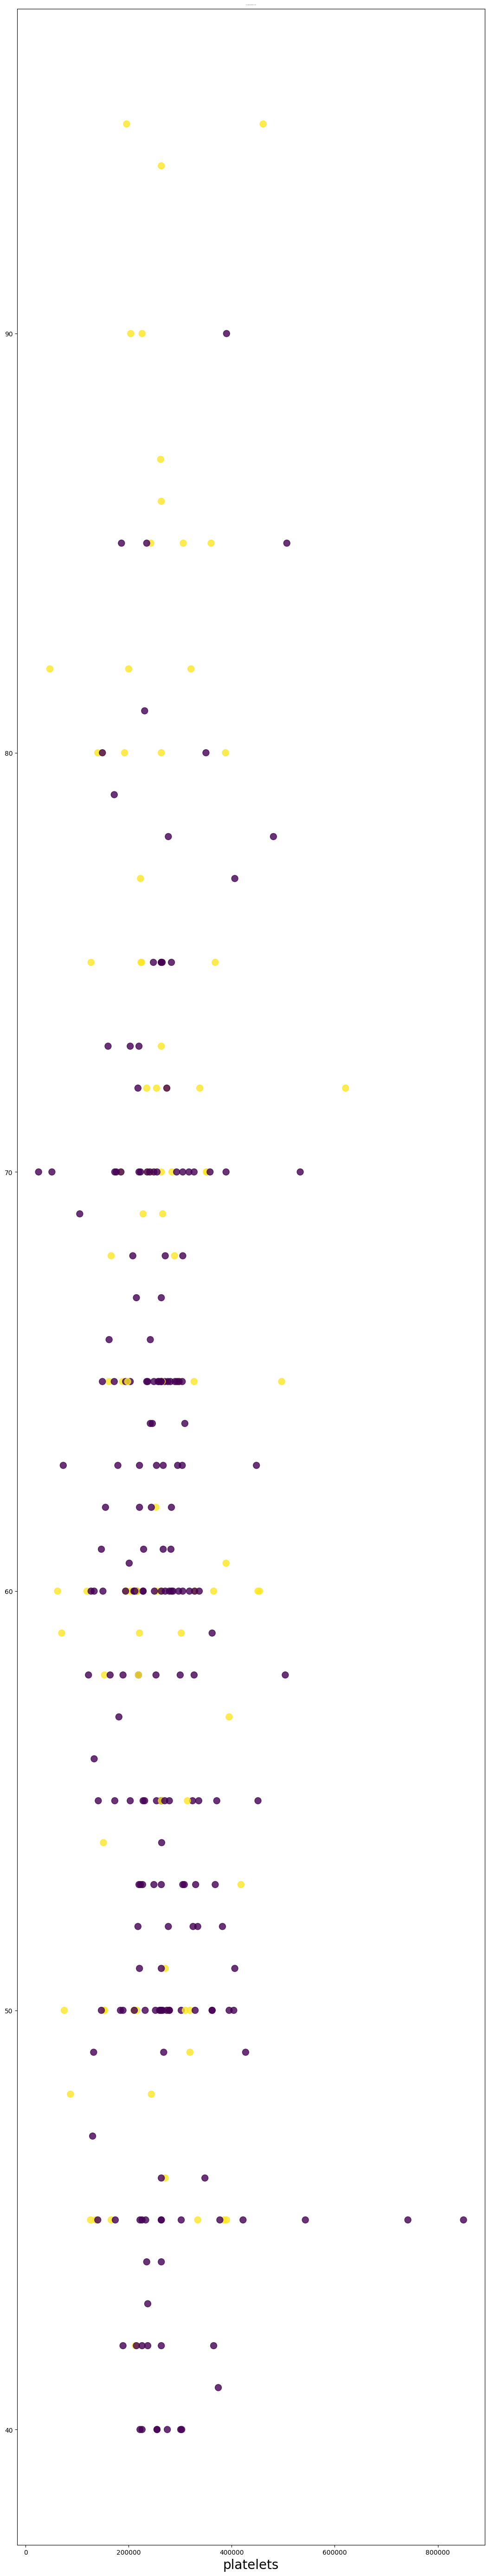

In [23]:
plt.figure(figsize=(13,71))
plt.scatter(platelets,age,c= data['DEATH_EVENT'],s=100,alpha=(0.8))
plt.xlabel('platelets',fontsize=20)
plt.title("Validating the unbalanced data",fontsize=1)
plt.show()

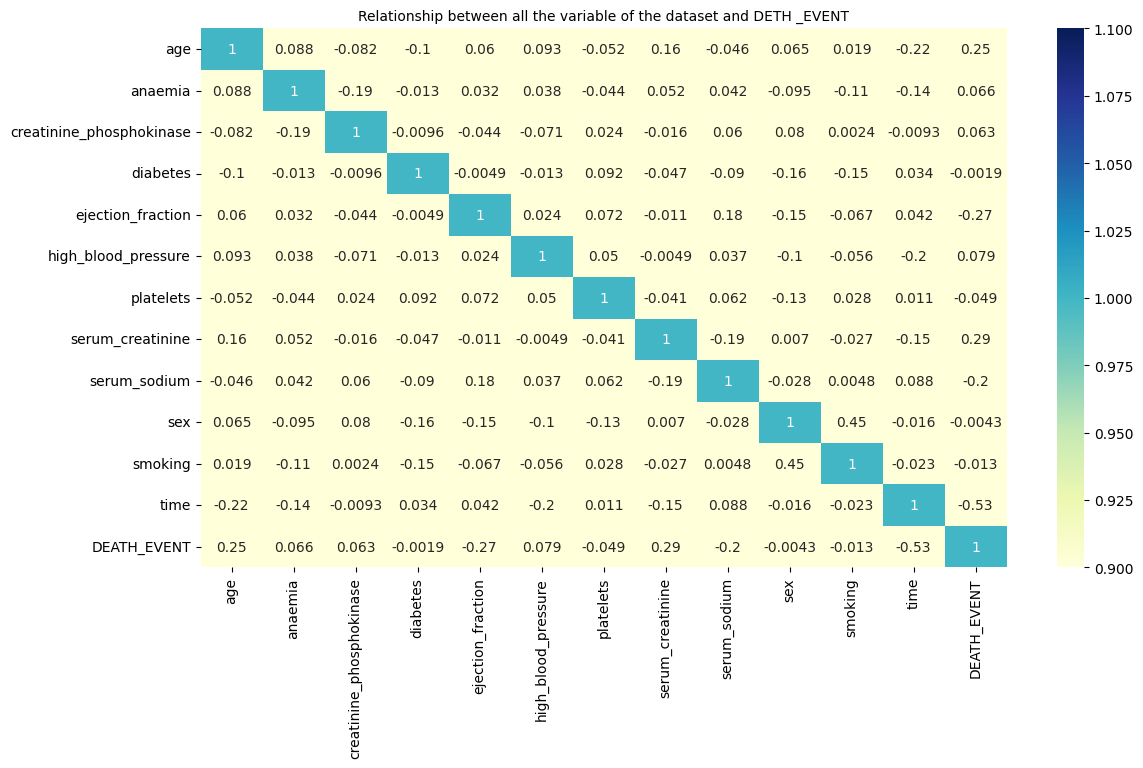

In [17]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(),vmin=1,vmax=1,cmap='YlGnBu',annot=True)
plt.title('Relationship between all the variable of the dataset and DETH _EVENT',fontsize=10 )
plt.show()

In [24]:
Categorical_data=['anemia','diabetes','high_blood_pressuure','sex','smoking']
continue_data=['age','creatinie_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

ValueError: Could not interpret value `anemia` for `x`. An entry with this name does not appear in `data`.

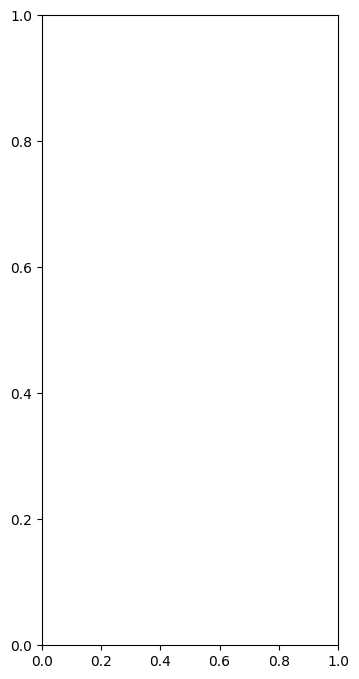

In [25]:
plt.figure(figsize=(13,18))
for i,cat in enumerate(Categorical_data):
  plt .subplot(2,3,i+1)
  sns.countplot(data = data , x= cat, hue ='DEATH_EVENT')
  plt.show()

<Axes: xlabel='diabetes', ylabel='count'>

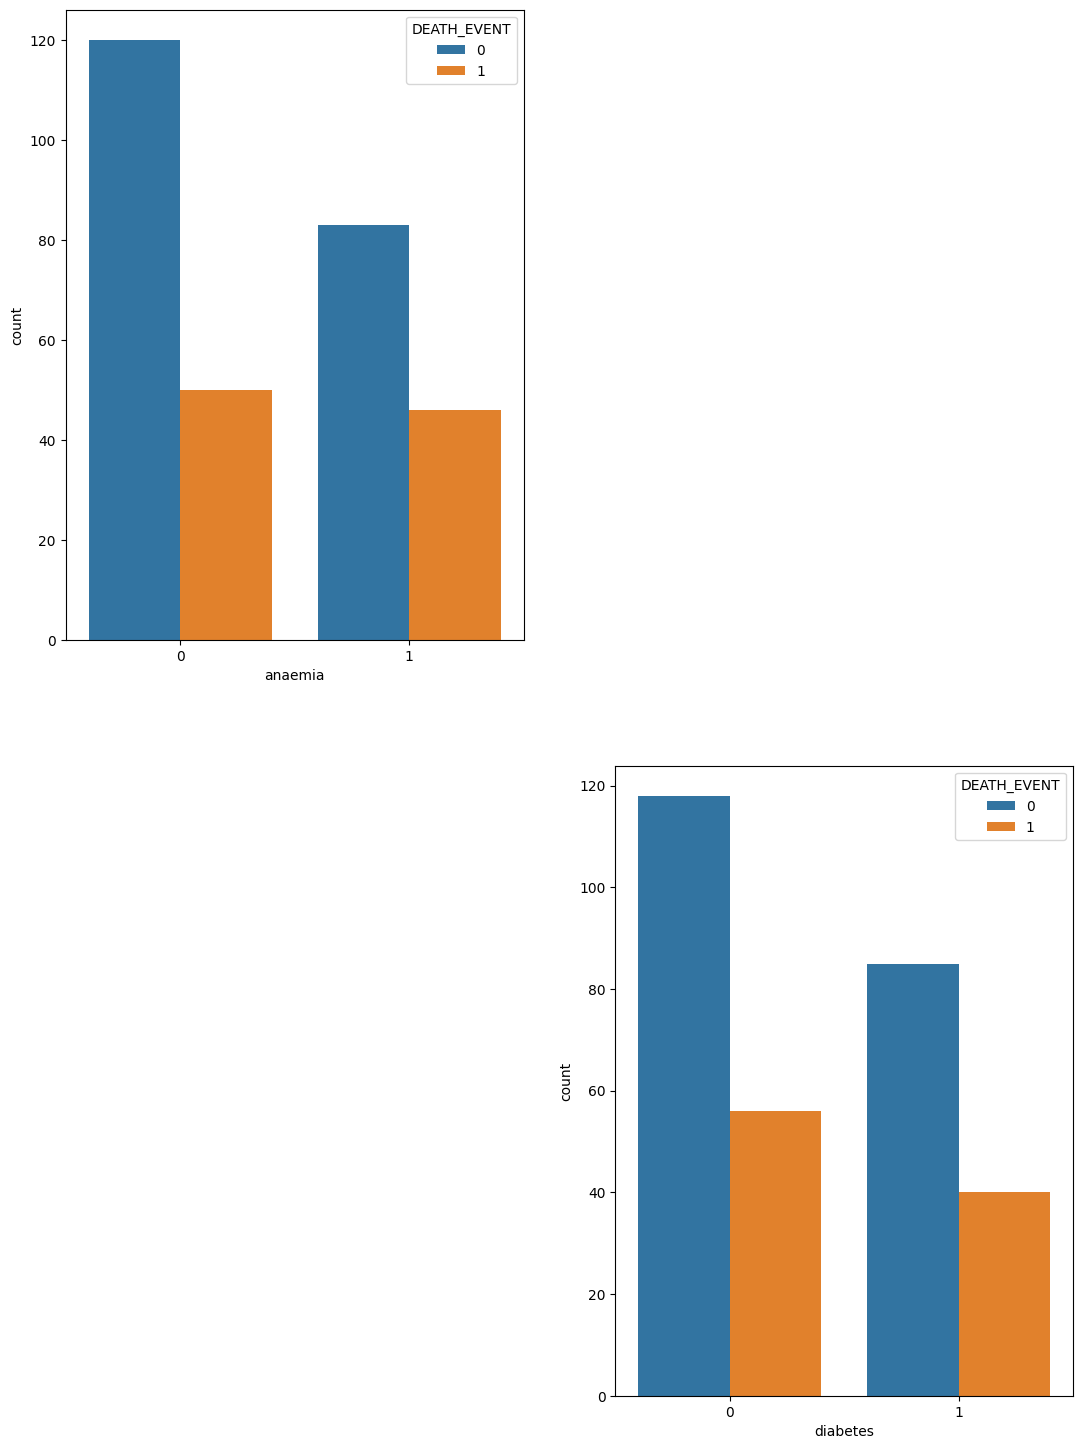

In [26]:
plt.figure(figsize=(13,18))
plt.subplot(2,2,1)
sns.countplot(data=data,x='anaemia',hue='DEATH_EVENT')
plt.subplot(2,2,4)
sns.countplot(data=data,x='diabetes',hue='DEATH_EVENT')

In [28]:
for i, cat in enumerate(Categorical_data):
  print(i,cat)

0 anemia
1 diabetes
2 high_blood_pressuure
3 sex
4 smoking


In [29]:
plt.figure(figsize=(17,35))
for i,con in enumerate(continue_data):
  j=0
  sns.histplot(0,1,j+1)
  sns.histplot(data=data,x=con,hue='DEATH_EVENT',multiple='stack')
  plt.show()

TypeError: histplot() takes from 0 to 1 positional arguments but 3 were given

<Figure size 1700x3500 with 0 Axes>

In [ ]:
for i,cat in enumerate(continue_data):
   print(i,cat)

0 age
1 creatinie_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


<Axes: xlabel='age', ylabel='Count'>

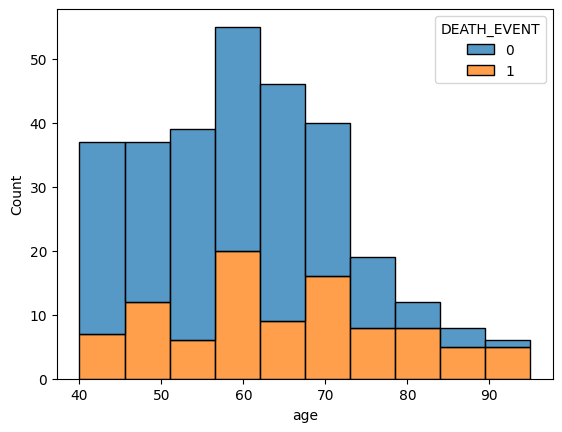

In [ ]:
sns.histplot (data=data,x='age',hue='DEATH_EVENT',multiple='stack')

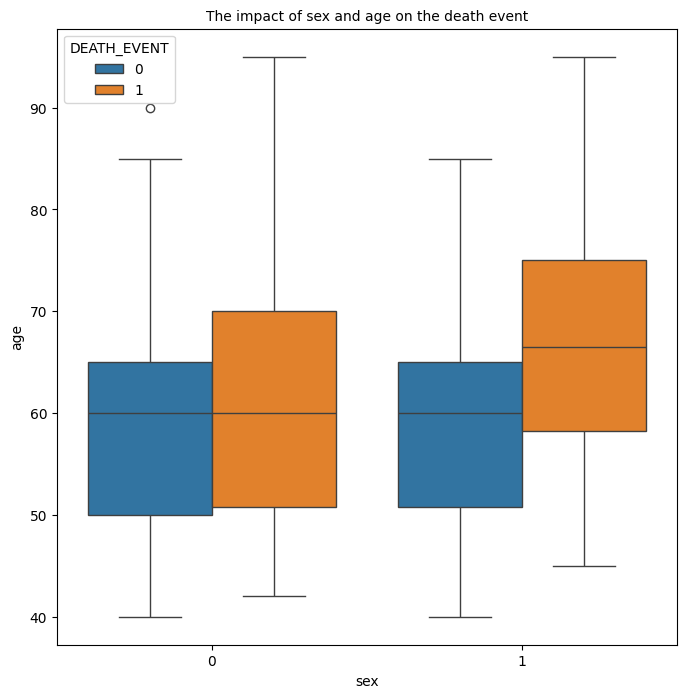

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data,x='sex',y='age',hue='DEATH_EVENT')
plt.title('The impact of sex and age on the death event',fontsize=10)
plt.show()

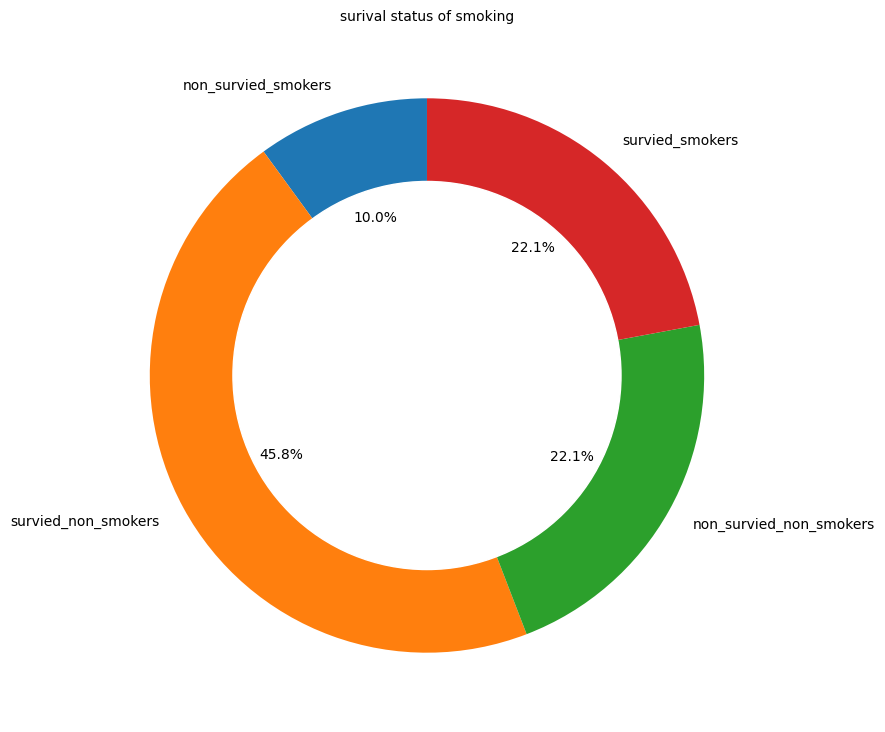

In [ ]:
smokers=data[data['smoking']==1]
non_smokers=data[data['smoking']==0]

non_survied_smokers= smokers[smokers['DEATH_EVENT']==1]
survied_non_smokers=non_smokers[non_smokers['DEATH_EVENT']==0]
non_survied_non_smokers=non_smokers[non_smokers['DEATH_EVENT']==1]
survied_smokers=smokers[smokers['DEATH_EVENT']==0]

smoking_data=[len(non_survied_smokers),len(survied_non_smokers),len(non_survied_non_smokers),len(survied_smokers)]
smoking_labels=["non_survied_smokers","survied_non_smokers","non_survied_non_smokers","survied_smokers"]

plt.figure(figsize=(9,9))
plt.pie(smoking_data, labels=smoking_labels, autopct='%.1f%%',startangle=90)
Circle =plt.Circle((0,0),0.7, color='white')
p=plt.gcf()
p.gca().add_artist(Circle)
plt.title('surival status of smoking',fontsize=10)
plt.show()

In [ ]:
type(non_smokers)

pandas.core.frame.DataFrame

In [ ]:
smokers[smokers['DEATH_EVENT']==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
22,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['anaemia'].plot(kind='hist', bins=20, title='anaemia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['creatinine_phosphokinase'].plot(kind='hist', bins=20, title='creatinine_phosphokinase')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['diabetes'].plot(kind='hist', bins=20, title='diabetes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='anaemia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='anaemia', y='creatinine_phosphokinase', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='creatinine_phosphokinase', y='diabetes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='diabetes', y='ejection_fraction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['smoking']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('smoking', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('smoking')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['smoking']
  ys = series['anaemia']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('smoking', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('smoking')
_ = plt.ylabel('anaemia')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['smoking']
  ys = series['creatinine_phosphokinase']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('smoking', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('smoking')
_ = plt.ylabel('creatinine_phosphokinase')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['smoking']
  ys = series['diabetes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('smoking', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('smoking')
_ = plt.ylabel('diabetes')

from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['anaemia'].plot(kind='line', figsize=(8, 4), title='anaemia')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['creatinine_phosphokinase'].plot(kind='line', figsize=(8, 4), title='creatinine_phosphokinase')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['diabetes'].plot(kind='line', figsize=(8, 4), title='diabetes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
(len(non_survied_smokers)/299)*100

10.033444816053512

In [ ]:
len(smokers[smokers['DEATH_EVENT']==1])

30

In [ ]:
smoking_data

[30, 137, 66, 66]

In [ ]:
smoking_labels

['non_survied_smokers',
 'survied_non_smokers',
 'non_survied_non_smokers',
 'survied_smokers']

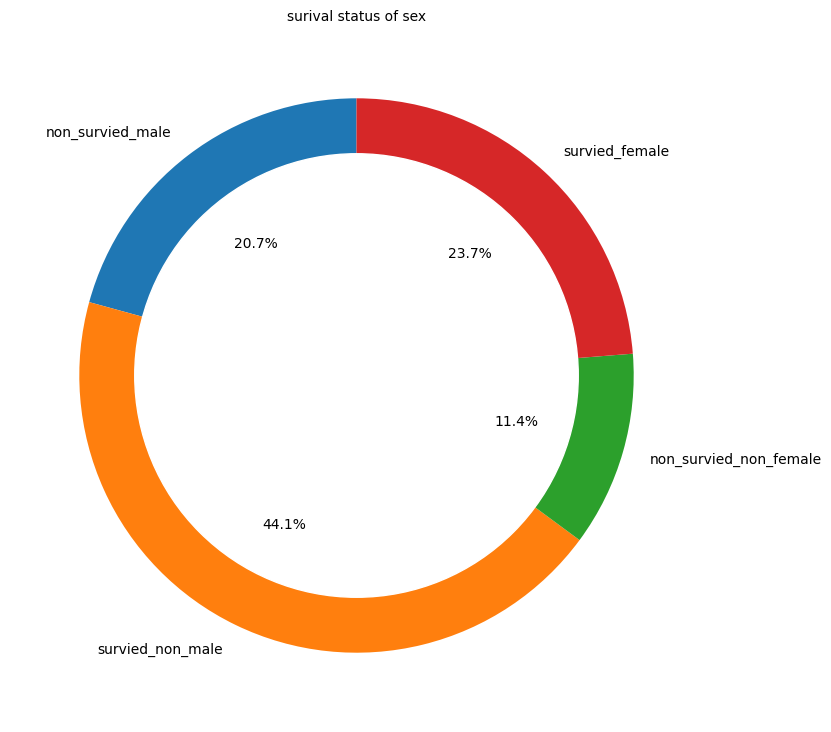

In [ ]:
male=data[data['sex']==1]
female =data[data['sex']==0]

non_survied_male=male[male['DEATH_EVENT']==1]
survied_non_male=male[male['DEATH_EVENT']==0]
non_survied_non_female=female[female['DEATH_EVENT']==1]
survied_female=female[female['DEATH_EVENT']==0]

sex_data=[len(non_survied_male),len(survied_non_male),len(non_survied_non_female),len(survied_female)]
sex_labels=["non_survied_male","survied_non_male","non_survied_non_female","survied_female"]

plt.figure(figsize=(9,9))
plt.pie(sex_data, labels=sex_labels, autopct='%.1f%%',startangle=90)
Circle =plt.Circle((0,0),0.8, color='white')
p=plt.gcf()
p.gca().add_artist(Circle)
plt.title('surival status of sex',fontsize=10)
plt.show()